# Classification model to predict bank marketing

Here, we are going to implement a machine learning model with the following steps

1. Problem Definition
2. Data Preprocessing
3. Feature engineering
4. Train the model & Model Evaluation

In [1]:
! pip install plotly==5.24.1

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

# 1. Problem Definition

The problem we are going to implement is Bank Marketing dataset. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

*_Problem definition: Since, the marketing are based on phone calls, what we are going to do is to predict the clients will subscribe a term deposit by the given data_*

Having a data that is relevant to the problem is important to the solution, since the result of the model are based on the quality and quantity of the data. thus, the data is directly impacting your machine learning model and its accuracy.

Dataset are taken from: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data
Variables: 

1. age (numeric)
2. job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
3. marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
4. education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
5. default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
6. housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
7. loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: ‘cellular’,’telephone’)
9. month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
10. day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)

social and economic context attributes

16. emp.var.rate: employment variation rate — quarterly indicator (numeric)
17. cons.price.idx: consumer price index — monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index — monthly indicator (numeric)
19. euribor3m: euribor 3 month rate — daily indicator (numeric)
20. nr.employed: number of employees — quarterly indicator (numeric)

Output variable (desired target):

21. y — has the client subscribed a term deposit? (binary: ‘yes’,’no’)


# 2. Data preprocessing

Importing the CSV files using Pandas in Python

In [3]:
df = pd.read_csv("archive/bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Identify the dataset shape

_Here, we have 41188 data with 21 columns with y as the target variable_

In [4]:
print('rows: '+str(df.shape[0]))
print("cols: "+str(df.shape[1]))
print(df.dtypes)

rows: 41188
cols: 21
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


Identifying the dataset data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 3. Feature Engineering

Handling missing values

In [6]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Handling duplicate values

In [8]:
df.duplicated().sum()

12

In [9]:
df.drop_duplicates(inplace=True)
df=df.reset_index(drop=True)

In [10]:
df.shape

(41176, 21)

Handling Outliers

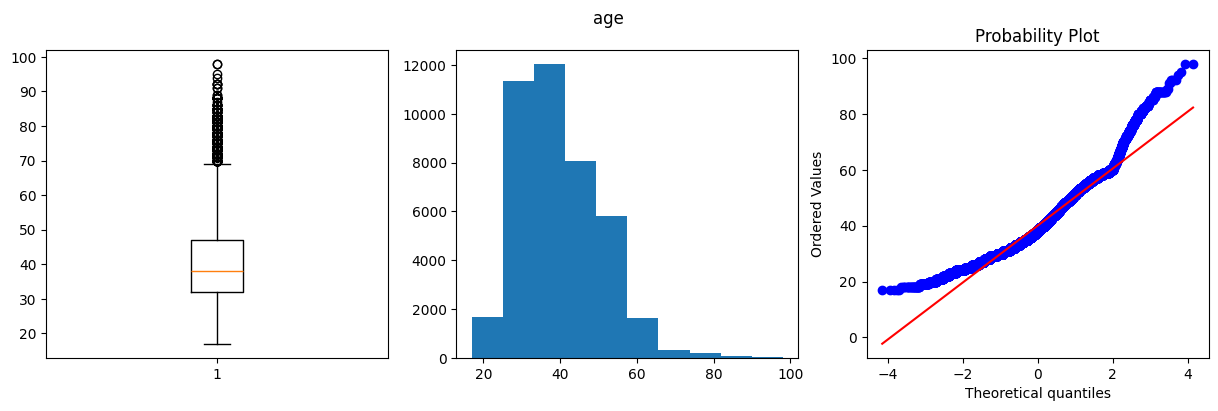

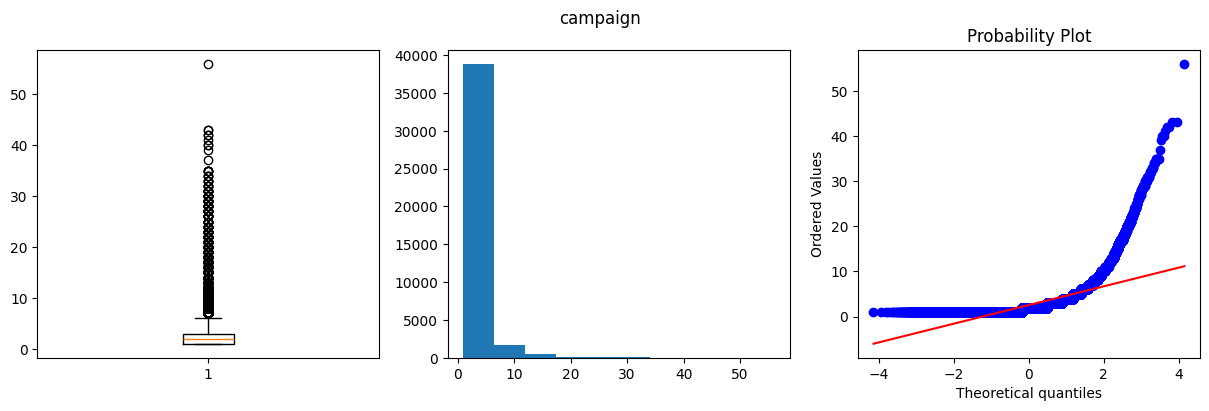

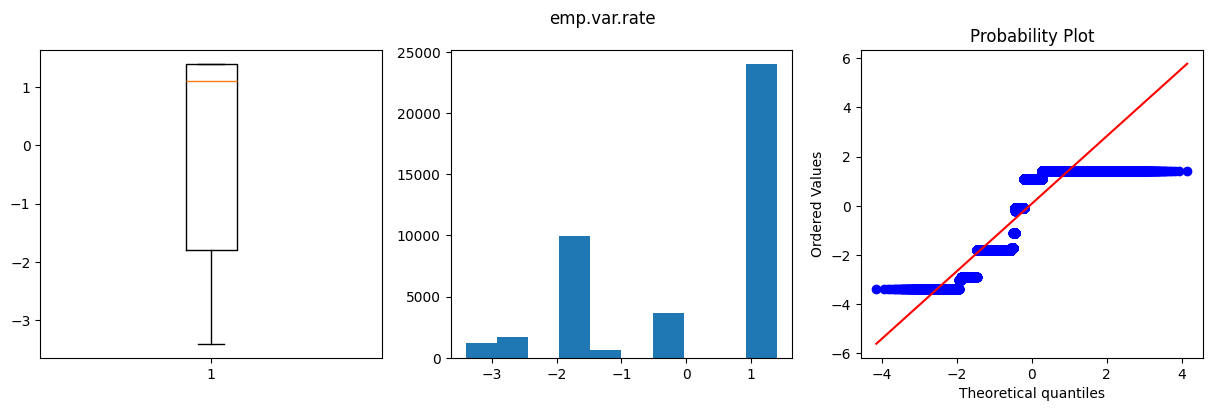

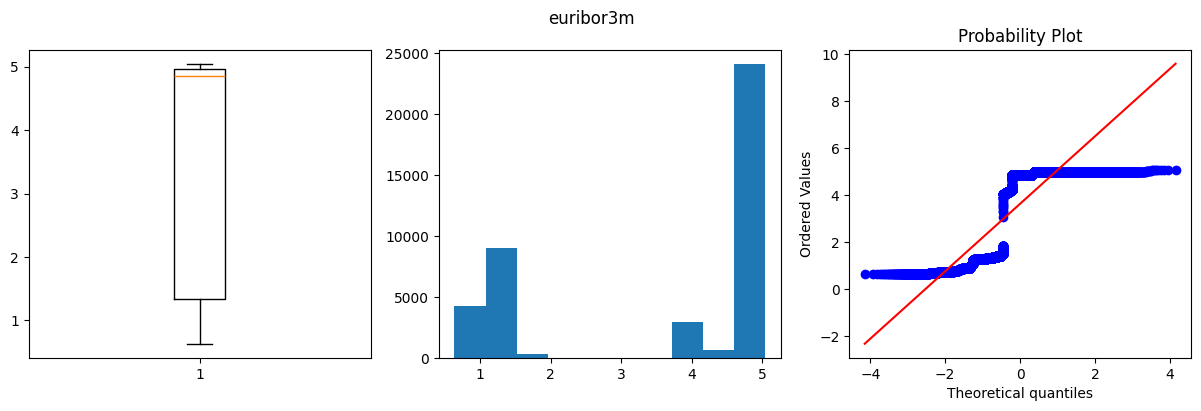

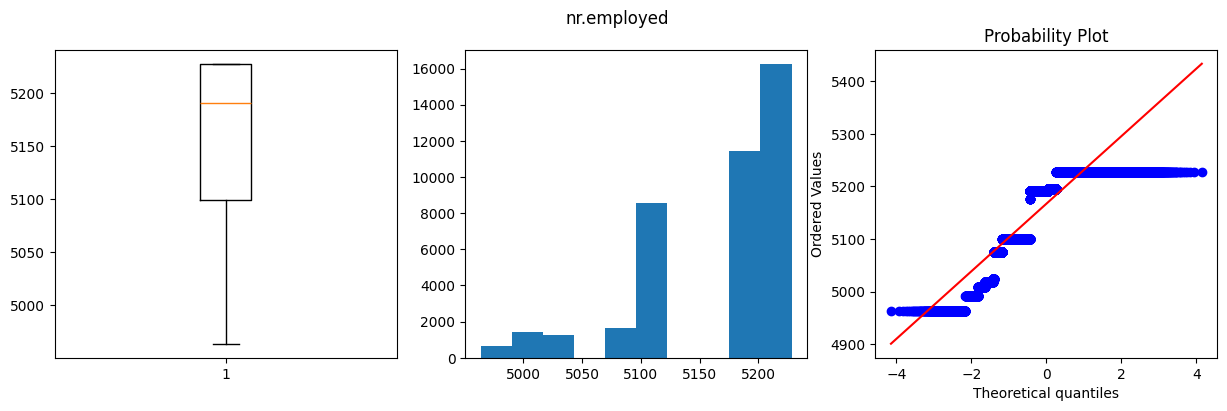

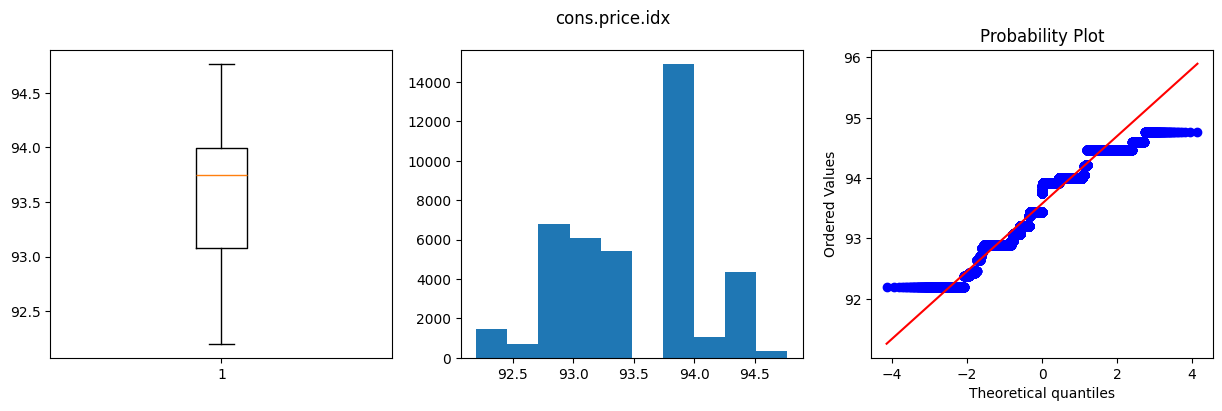

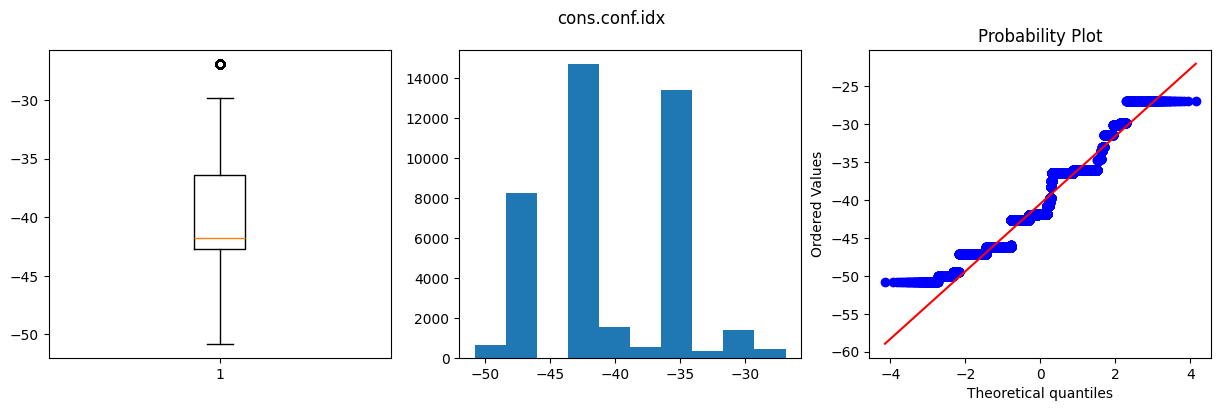

In [11]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['age', 'campaign', 'emp.var.rate', 'euribor3m', 'nr.employed', 'cons.price.idx', 'cons.conf.idx']

for col in cols: 
    fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15, 4))
    fig.suptitle(col)
    axes[0].boxplot(df[col])
    axes[1].hist(df[col])
    stats.probplot(df[col], dist='norm', plot=axes[2])
    plt.show()

Age outlier

Text(0.5, 1.0, 'Age Outliers')

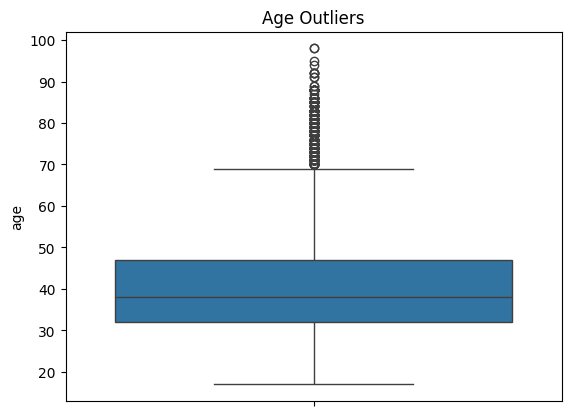

In [12]:
sns.boxplot(y = 'age' , data=df)
plt.title('Age Outliers')

In [13]:
#Handling age outliers
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

#Calculate Interquartile Range
iqr=q3-q1

#calculate bounds
lower_bound= q1 - 1.5 *iqr
upper_bound= q3 + 1.5 *iqr

df['age'] = np.where(df['age'] < lower_bound, lower_bound, df['age'])
df['age'] = np.where(df['age'] > upper_bound, upper_bound, df['age'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69.5,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Text(0.5, 1.0, 'Age Outliers')

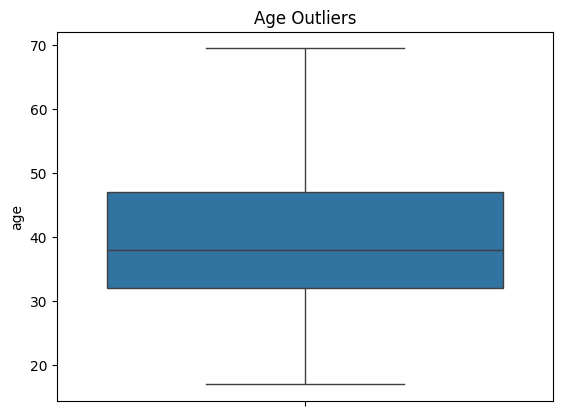

In [14]:
sns.boxplot(y = 'age' , data=df)
plt.title('Age Outliers')

Campaign outlier

Text(0.5, 1.0, 'campaign Outlier')

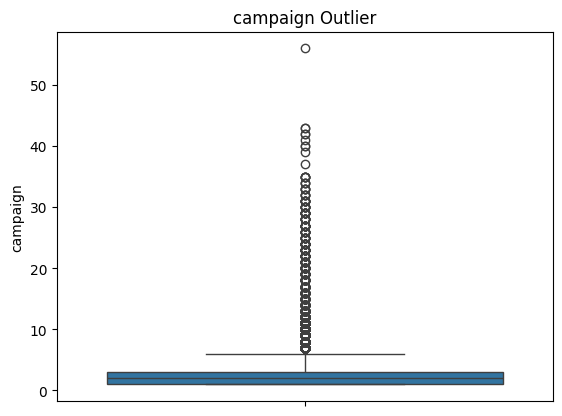

In [15]:
sns.boxplot(y = 'campaign' , data=df)
plt.title('campaign Outlier')

In [16]:
#Handling age outliers
q1 = df['campaign'].quantile(0.25)
q3 = df['campaign'].quantile(0.75)

#Calculate Interquartile Range
iqr=q3-q1

#calculate bounds
lower_bound= q1 - 1.5 *iqr
upper_bound= q3 + 1.5 *iqr

df['campaign'] = np.where(df['campaign'] < lower_bound, lower_bound, df['campaign'])
df['campaign'] = np.where(df['campaign'] > upper_bound, upper_bound, df['campaign'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69.5,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Text(0.5, 1.0, 'campaign Outliers')

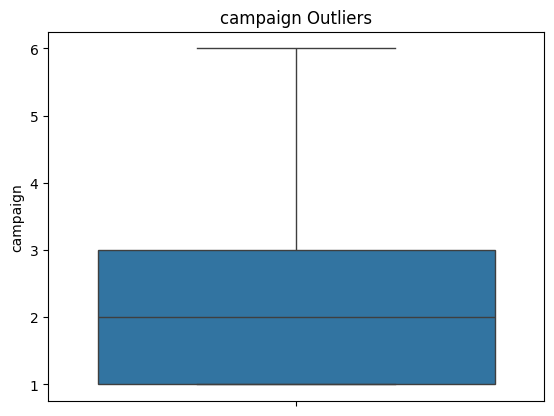

In [17]:
sns.boxplot(y = 'campaign' , data=df)
plt.title('campaign Outliers')

Consumer confidence index outlier

Text(0.5, 1.0, 'cons.conf.idx Outliers')

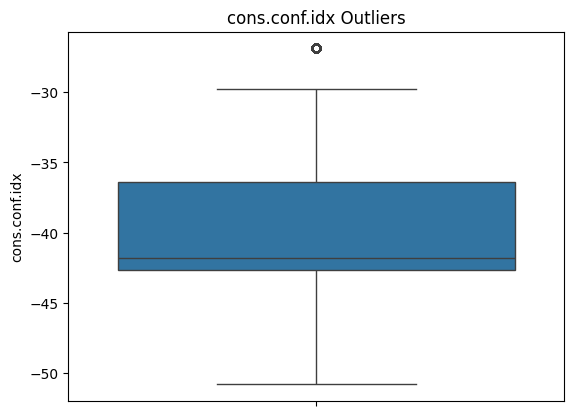

In [18]:
sns.boxplot(y = 'cons.conf.idx' , data=df)
plt.title('cons.conf.idx Outliers')

In [19]:
#Handling age outliers
q1 = df['cons.conf.idx'].quantile(0.25)
q3 = df['cons.conf.idx'].quantile(0.75)

#Calculate Interquartile Range
iqr=q3-q1

#calculate bounds
lower_bound= q1 - 1.5 *iqr
upper_bound= q3 + 1.5 *iqr

df['cons.conf.idx'] = np.where(df['cons.conf.idx'] < lower_bound, lower_bound, df['cons.conf.idx'])
df['cons.conf.idx'] = np.where(df['cons.conf.idx'] > upper_bound, upper_bound, df['cons.conf.idx'])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69.5,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41172,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41173,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41174,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Text(0.5, 1.0, 'cons.conf.idx Outliers')

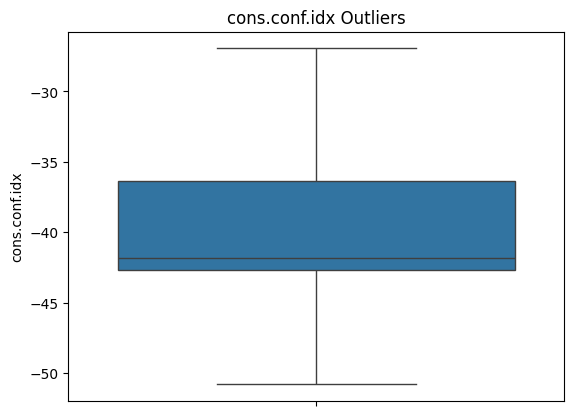

In [20]:
sns.boxplot(y = 'cons.conf.idx' , data=df)
plt.title('cons.conf.idx Outliers')

emp.var.rate

Text(0.5, 1.0, 'emp.var.rate Outliers')

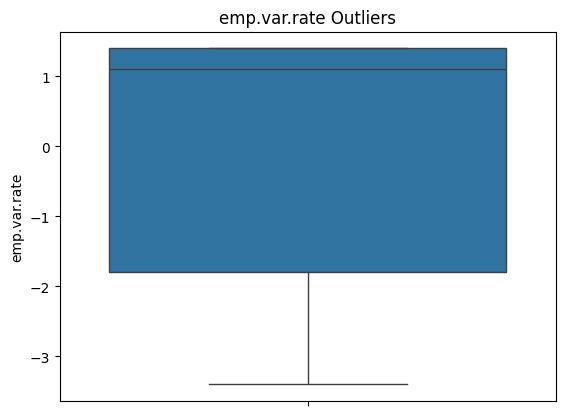

In [21]:
sns.boxplot(y = 'emp.var.rate' , data=df)
plt.title('emp.var.rate Outliers')

euribor 3 month rate

Text(0.5, 1.0, 'Euriobor 3 month rate Outliers')

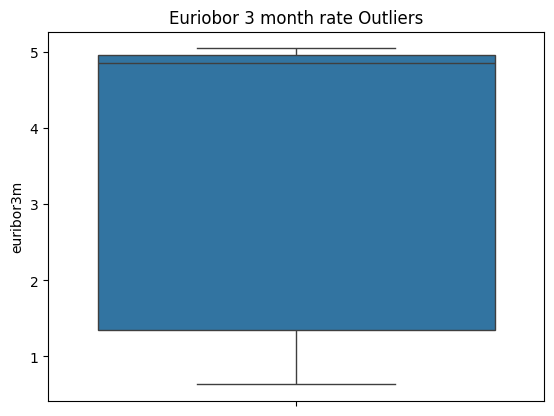

In [22]:
sns.boxplot(y = 'euribor3m' , data=df)
plt.title('Euriobor 3 month rate Outliers')

In [23]:
df_label=df.select_dtypes(include='object')
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41176 non-null  object
 1   marital      41176 non-null  object
 2   education    41176 non-null  object
 3   default      41176 non-null  object
 4   housing      41176 non-null  object
 5   loan         41176 non-null  object
 6   contact      41176 non-null  object
 7   month        41176 non-null  object
 8   day_of_week  41176 non-null  object
 9   poutcome     41176 non-null  object
 10  y            41176 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [24]:
df_label.nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [25]:
df['contact'] = df['contact'].astype('category').cat.codes

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  float64
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  int8   
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  float64
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

## Exploratory data analysis

In [27]:
cols = ['age', 'campaign', 'emp.var.rate', 'euribor3m', 'nr.employed', 'cons.price.idx', 'cons.conf.idx']

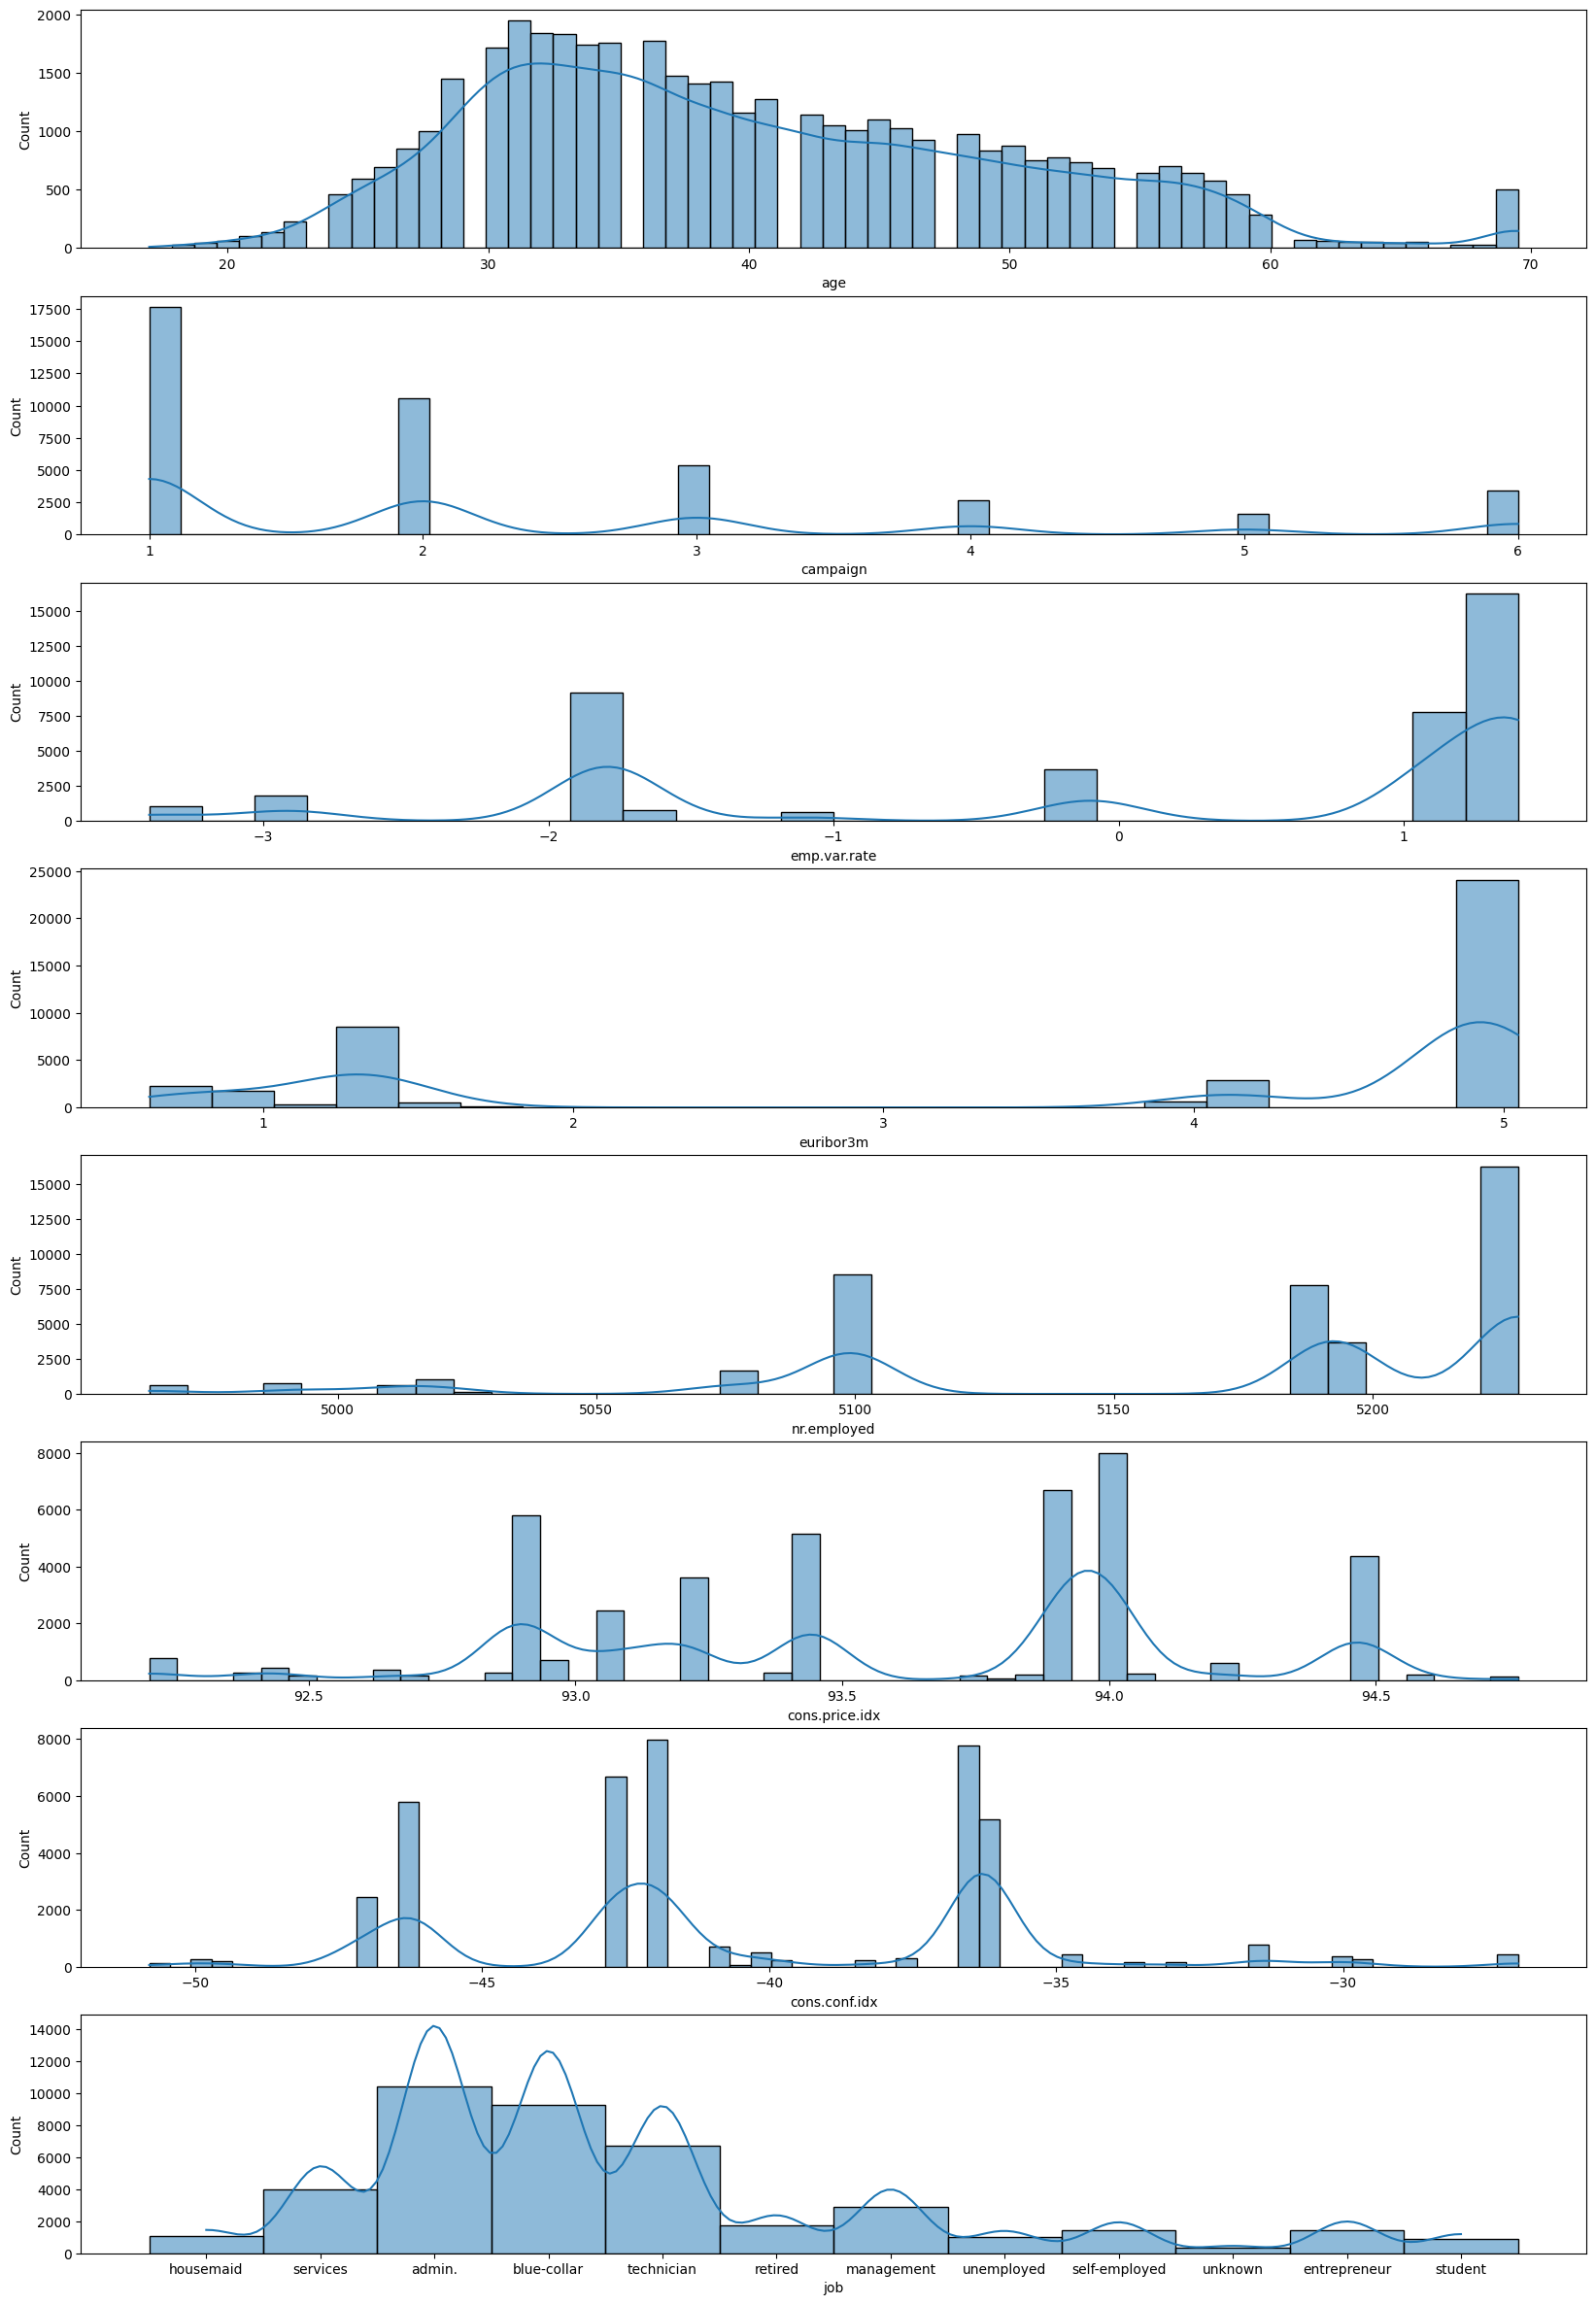

In [28]:
# Age Distribution

fig, axs = plt.subplots(nrows=8, figsize=(20,30))

sns.histplot(df['age'], ax=axs[0] ,kde=True)
sns.histplot(df['campaign'] , ax=axs[1],kde=True)
sns.histplot(df['emp.var.rate'] , ax=axs[2],kde=True)
sns.histplot(df['euribor3m'] , ax=axs[3],kde=True)
sns.histplot(df['nr.employed'] , ax=axs[4],kde=True)
sns.histplot(df['cons.price.idx'] , ax=axs[5],kde=True)
sns.histplot(df['cons.conf.idx'] , ax=axs[6],kde=True)
sns.histplot(df['job'] , ax=axs[7],kde=True)


plt.show()

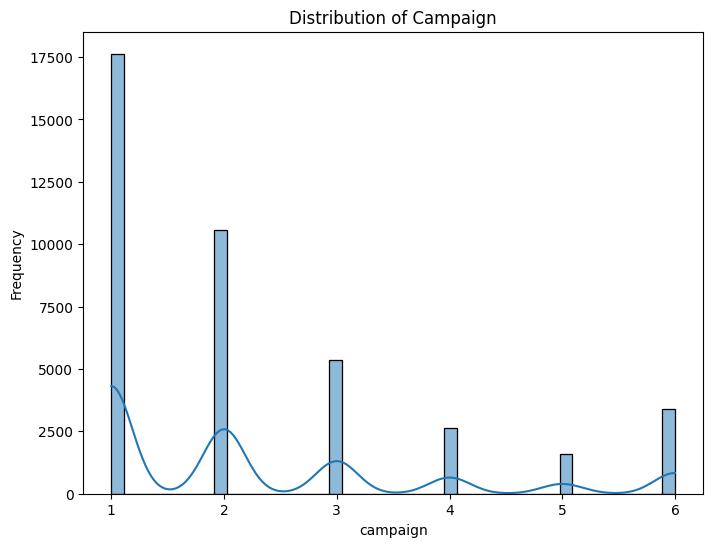

In [29]:
# Duration Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['campaign'], kde=True)
plt.title('Distribution of Campaign')
plt.xlabel('campaign')
plt.ylabel('Frequency')
plt.show()

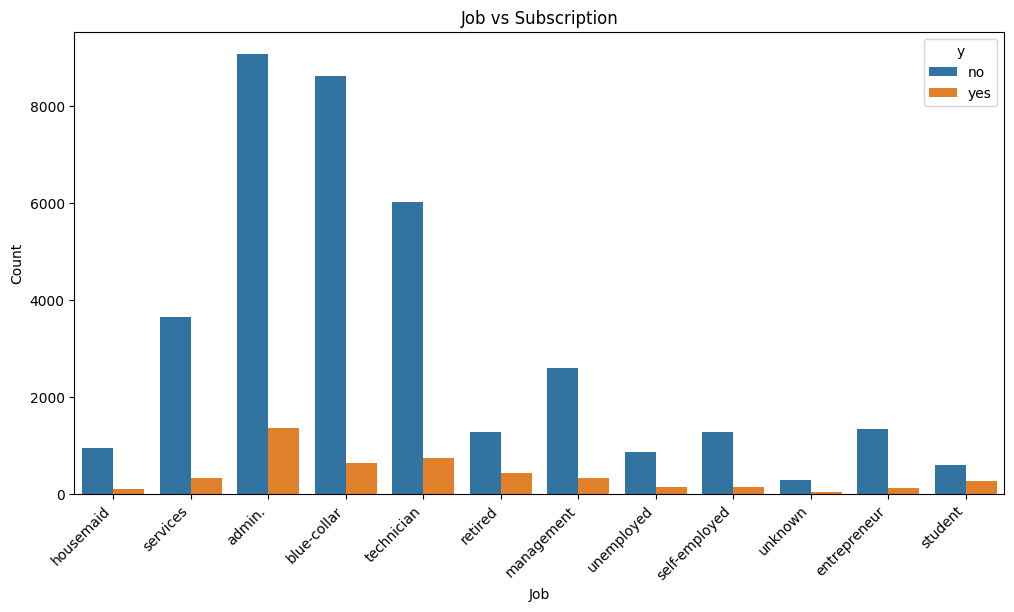

In [30]:
# bar plot of job vs subscribed
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Job vs Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

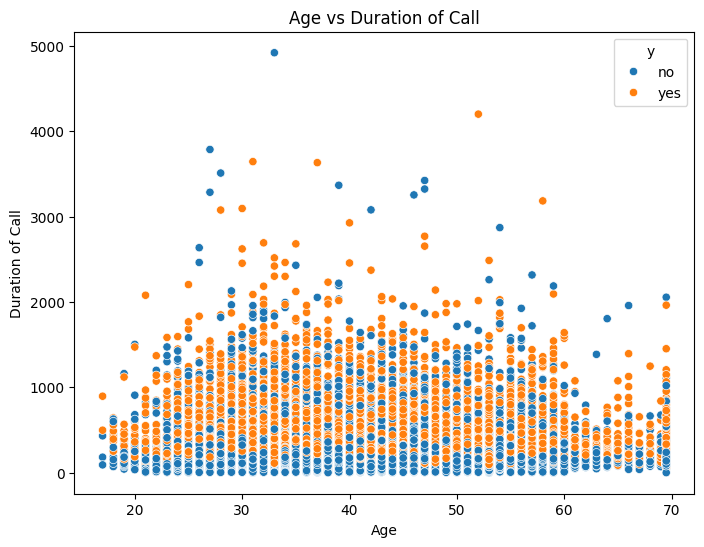

In [31]:
# Scatter plot of age vs duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='duration', hue='y', data=df)
plt.title('Age vs Duration of Call')
plt.xlabel('Age')
plt.ylabel('Duration of Call')
plt.show()

In [32]:
# 3D Scatter Plot (Example: age, duration, campaign)
fig = px.scatter_3d(df, x='age', y='duration', z='campaign', color='y', 
                    title='Age, Duration, Campaign and Subscription')
fig.show()

<Axes: xlabel='y', ylabel='count'>

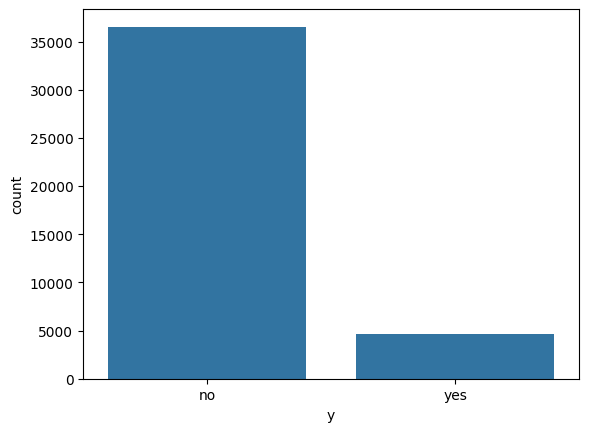

In [33]:
sns.countplot(x='y', data=df, order=df['y'].value_counts().index)

In [34]:
df['y'].value_counts

<bound method IndexOpsMixin.value_counts of 0         no
1         no
2         no
3         no
4         no
        ... 
41171    yes
41172     no
41173     no
41174    yes
41175     no
Name: y, Length: 41176, dtype: object>

Feature encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

In [36]:
cat_cols= df.select_dtypes(include='object')
cat_cols

,job,marital,education,default,housing,loan,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,may,mon,nonexistent
2,services,married,high.school,no,yes,no,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,may,mon,nonexistent
4,services,married,high.school,no,no,yes,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...
41171,retired,married,professional.course,no,yes,no,nov,fri,nonexistent
41172,blue-collar,married,professional.course,no,no,no,nov,fri,nonexistent
41173,retired,married,university.degree,no,yes,no,nov,fri,nonexistent
41174,technician,married,professional.course,no,no,no,nov,fri,nonexistent


In [37]:
for columns in cat_cols:
    df[columns]=label_encoder.fit_transform(df[columns])

In [38]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,69.5,5,1,5,0,2,0,0,7,0,...,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46.0,1,1,5,0,0,0,0,7,0,...,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56.0,5,1,6,0,2,0,0,7,0,...,2.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44.0,9,1,5,0,0,0,0,7,0,...,1.0,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


Correlation matrix represents the correlations between pairs of variables. it lies bet ween -1 and +1. minus values say that there are negative correlation and positive values says that there is positive correlation.
Using the heatmap, we can see that 'campaign', 'poutcome' and 'cons.conf.idx' have a positive correlation to the target. However, both 'default' and 'nr.employed' have a negative correlation  

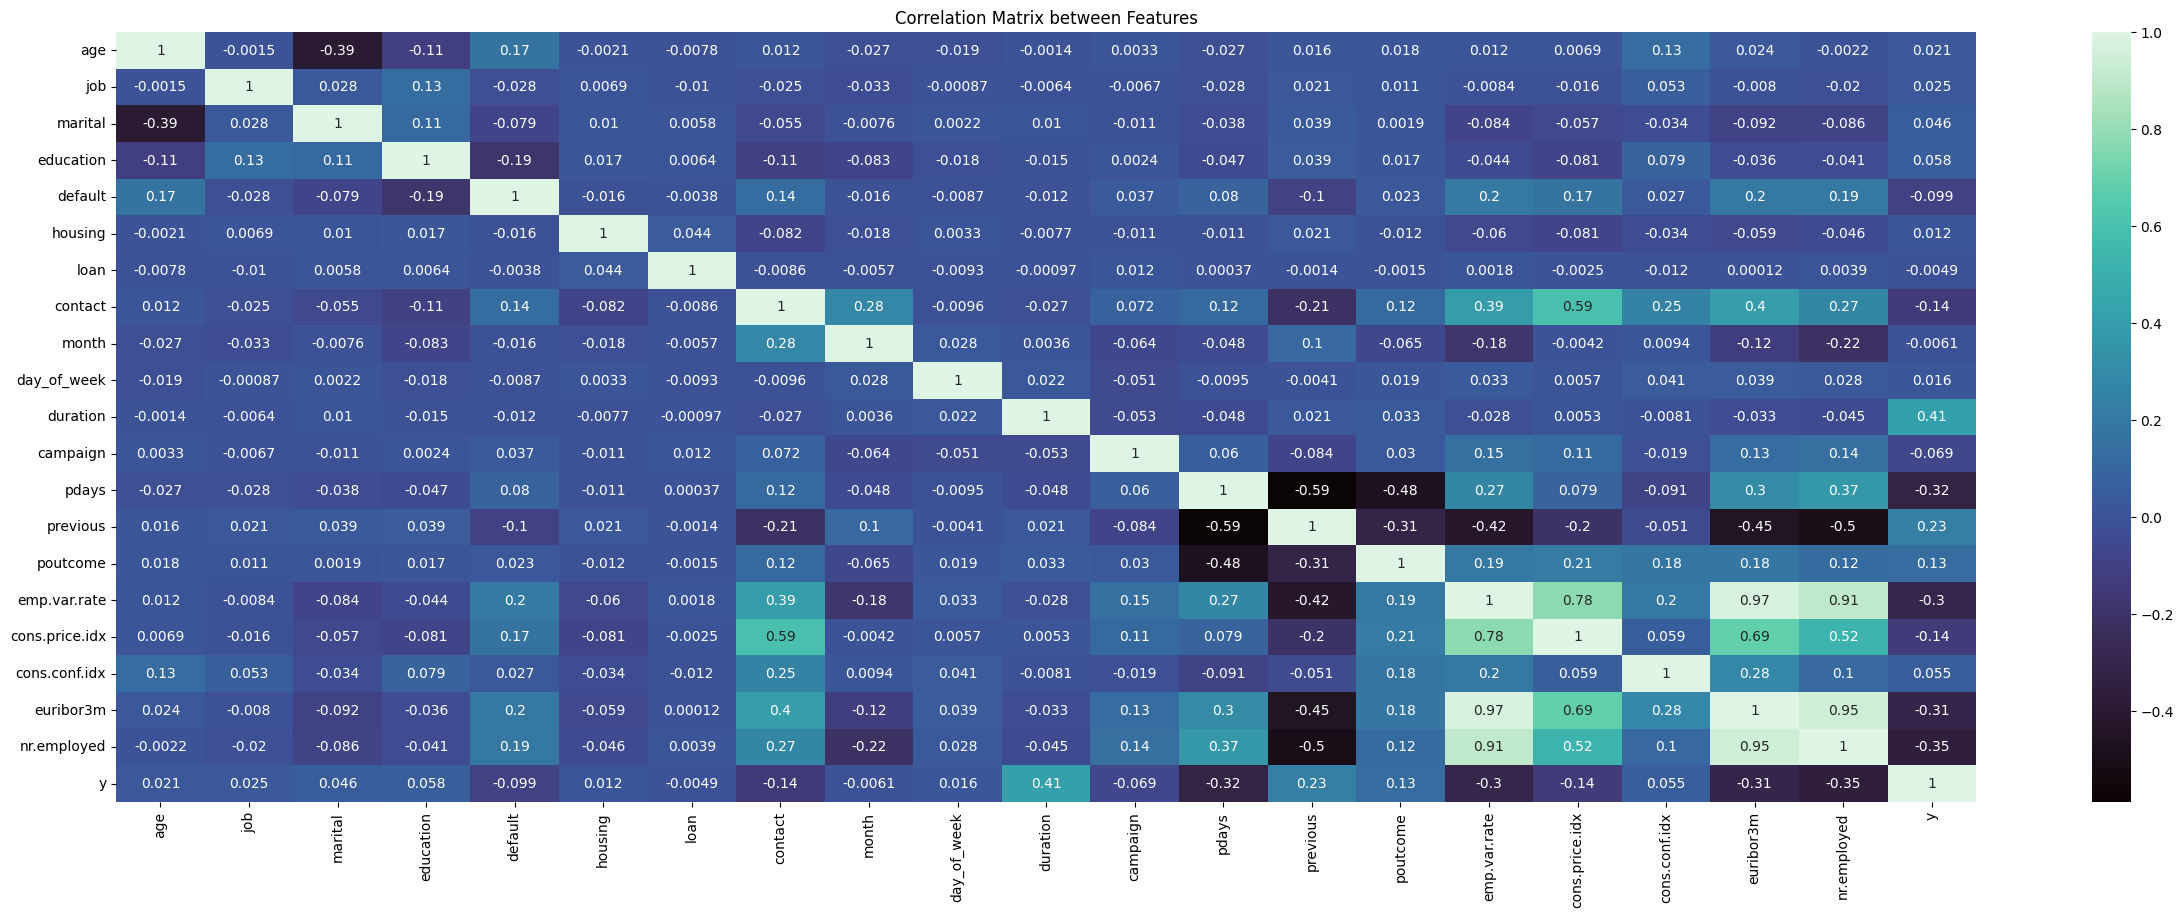

In [39]:
corr=df.corr()
plt.figure(figsize=(30, 10))
sns.heatmap(corr,annot=True,cmap='mako')
plt.title('Correlation Matrix between Features')
plt.show()

# 4. Train the model & Model evaluation

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [41]:
def preprocess_inputs(df):
    df=df.copy()
    #splitting the data between target and feature dataset
    y=df['y']
    x=df.drop('y',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    #scaling the dataset
    
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    return x_train,x_test,y_train,y_test

In [42]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28823, 20)
(12353, 20)
(28823,)
(12353,)


In [43]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.294192,-0.195282,-0.286222,1.522402,-0.515050,-1.081833,-0.454204,-0.765472,-1.399172,-0.724061,-0.587994,-0.176205,0.198344,-0.349682,0.186944,0.838143,-0.231478,0.950450,0.773710,0.844805
1,-1.574945,-1.030675,1.353240,0.587159,-0.515050,0.947233,-0.454204,-0.765472,-1.830829,-0.724061,-0.622692,-0.821947,0.198344,-0.349682,0.186944,-1.199496,-0.868598,-1.429919,-1.279422,-0.939241
2,0.898449,1.475505,-0.286222,0.587159,-0.515050,0.947233,-0.454204,-0.765472,-1.399172,0.706884,-0.707512,-0.821947,0.198344,1.659263,-2.563580,-1.899934,-2.377658,1.967516,-1.580471,-1.255944
3,-0.882395,-0.752211,1.353240,-0.815705,-0.515050,0.947233,-0.454204,1.306384,0.759109,0.706884,-0.553295,-0.821947,0.198344,-0.349682,0.186944,0.647115,0.718159,0.885530,0.710847,0.331719
4,2.926632,0.361647,-1.925684,-0.348084,-0.515050,0.947233,-0.454204,-0.765472,-0.967516,0.706884,0.098272,-0.821947,0.198344,-0.349682,0.186944,-1.963611,-1.493632,1.621281,-1.681974,-1.984775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28818,0.403770,1.475505,-1.925684,0.587159,1.940746,0.947233,-0.454204,-0.765472,-1.830829,-0.008589,-0.333536,-0.176205,0.198344,-0.349682,0.186944,-1.199496,-0.868598,-1.429919,-1.276538,-0.939241
28819,-0.090909,-1.030675,-0.286222,0.587159,-0.515050,-1.081833,-0.454204,-0.765472,-1.399172,1.422356,-0.854018,-0.176205,0.198344,-0.349682,0.186944,0.838143,-0.231478,0.950450,0.773133,0.844805
28820,-0.882395,1.475505,-0.286222,1.054781,-0.515050,0.947233,-0.454204,-0.765472,-0.535860,-1.439533,-0.356668,-0.176205,0.198344,-0.349682,0.186944,0.838143,0.586936,-0.477772,0.769096,0.844805
28821,-1.179202,-1.030675,1.353240,1.054781,-0.515050,0.947233,-0.454204,-0.765472,1.622421,-0.724061,-0.641969,1.115278,-4.983543,5.677151,-2.563580,-0.753762,1.766213,-1.949272,-1.494539,-2.813181


Logistic Regression

In [44]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
print(model1.score(x_test,y_test))

0.9129766048733101


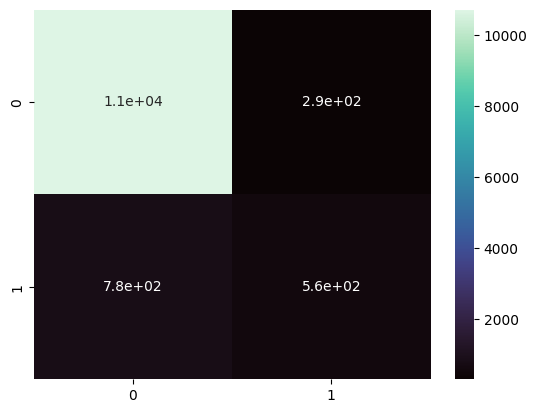

In [45]:
y_pred=model1.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()

In [46]:
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9129766048733101


In [47]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11504
           1       0.42      0.66      0.51       849

    accuracy                           0.91     12353
   macro avg       0.69      0.79      0.73     12353
weighted avg       0.94      0.91      0.92     12353



Random Forest

In [48]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.916133732696511


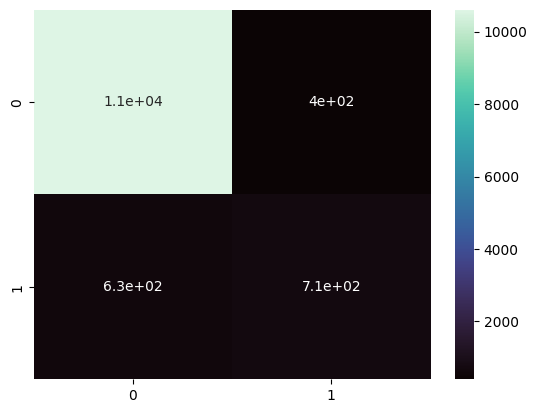

In [49]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()

In [50]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11239
           1       0.53      0.64      0.58      1114

    accuracy                           0.92     12353
   macro avg       0.75      0.79      0.77     12353
weighted avg       0.92      0.92      0.92     12353



In [51]:
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.916133732696511


# Suggestion
By looking at the performance of Random Forest model, we can state that the model has better performance than logisctic regression. However, both model only classify not more than 60% of the true positives with precision of 50%. By seeing the number of 'yes' in the dataset, there are only 10% 'yes' in the entire dataset. So, it can be concluded that the model performance is moderate given the poor quality of the dataset. As the solution to the imbalance data classes we can do resampling to balance the imbalance target variable.

## Balancing the Imbalance data classes

We apply Resampling to balance the data classes

In [66]:
df['y'].value_counts()

0    36537
1     4639
Name: y, dtype: int64

In [67]:
from sklearn.utils import resample

majority=df[(df['y']==0)]
minority=df[(df['y']==1)]

upsampled= resample(minority,replace=True,n_samples=36537,random_state=42)
df_sampled=pd.concat([majority,upsampled])

In [68]:
df_sampled['y'].value_counts()

0    36537
1    36537
Name: y, dtype: int64

In [70]:
x_train,x_test,y_train,y_test=preprocess_inputs(df_sampled)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(51151, 20)
(21923, 20)
(51151,)
(21923,)


In [71]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.626666,0.879214,-0.334615,0.513768,-0.434111,0.927499,-0.443111,-0.621878,-0.479537,1.417103,-0.539481,0.592398,0.356119,-0.450550,0.023282,1.099013,0.697698,-0.472893,1.056596,1.064548
1,-0.714553,0.879214,-0.334615,-0.422938,2.302208,-1.104518,-0.443111,-0.621878,0.717087,-0.738045,0.705483,0.592398,-2.795271,0.995706,2.165139,-0.756636,-0.923662,-1.124738,-0.910133,-0.418437
2,0.955296,1.432398,-0.334615,0.513768,-0.434111,0.927499,-0.443111,-0.621878,-1.676161,-0.019662,0.829979,-0.778597,-2.827135,0.995706,2.165139,-0.756636,-0.635772,-1.292355,-0.846144,-0.418437
3,-0.450893,-0.780336,1.275382,-1.359643,2.302208,0.927499,-0.443111,1.608033,0.717087,1.417103,1.098338,-0.778597,0.356119,-0.450550,0.023282,0.925046,0.817916,0.700427,1.001597,0.638046
4,-1.329760,-1.056927,1.275382,-0.422938,-0.434111,0.927499,-0.443111,1.608033,-0.080662,-0.019662,2.368201,2.648890,0.356119,-0.450550,0.023282,1.099013,1.562950,-0.305276,1.053952,1.064548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51146,1.043183,-0.780336,-0.334615,0.513768,-0.434111,-1.104518,2.361862,1.608033,0.717087,1.417103,0.619719,0.592398,0.356119,-0.450550,0.023282,0.925046,0.817916,0.700427,1.000540,0.638046
51147,-1.417647,-0.503744,1.275382,0.982120,-0.434111,0.927499,-0.443111,-0.621878,-0.479537,0.698721,1.164736,0.592398,0.356119,-0.450550,0.023282,1.099013,0.697698,-0.472893,1.055538,1.064548
51148,-0.099345,1.432398,1.275382,0.513768,-0.434111,-1.104518,-0.443111,1.608033,0.717087,-1.456428,1.859149,1.963393,0.356119,-0.450550,0.023282,0.925046,0.817916,0.700427,1.000540,0.638046
51149,-0.626666,-0.780336,-0.334615,1.450473,-0.434111,0.927499,-0.443111,-0.621878,-0.479537,-0.738045,-0.951702,-0.093100,0.356119,-0.450550,0.023282,1.099013,0.697698,-0.472893,1.055009,1.064548


Logistic Regression

In [72]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
print(model1.score(x_test,y_test))

0.8640696984901701


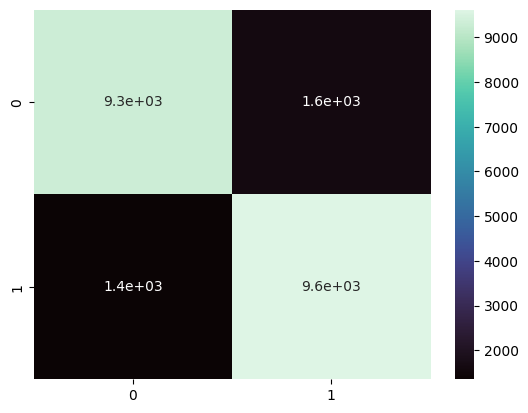

In [73]:
y_pred=model1.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()

In [74]:
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8640696984901701


In [75]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     10677
           1       0.88      0.86      0.87     11246

    accuracy                           0.86     21923
   macro avg       0.86      0.86      0.86     21923
weighted avg       0.86      0.86      0.86     21923



Random Forest

In [76]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.9640560142316289


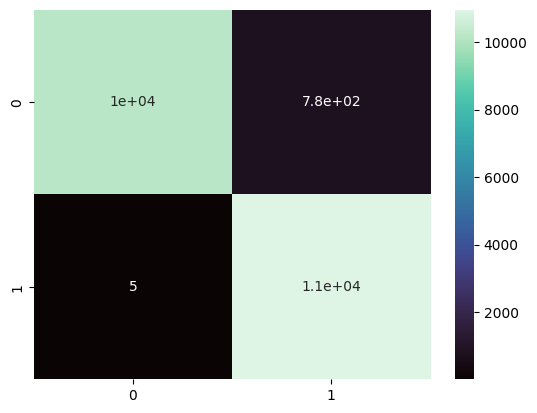

In [77]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='mako')
plt.show()

In [78]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10175
           1       1.00      0.93      0.97     11748

    accuracy                           0.96     21923
   macro avg       0.96      0.97      0.96     21923
weighted avg       0.97      0.96      0.96     21923



In [79]:
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9640560142316289


## Conclusion

By doing resample, we can see that for random forest model the precision, recall, F1 score and accuracy are improved. the balanced data classed improved the model performance drastically and the model accuracy improved from 91% to 94%. It means that the model can almost perfectly classify the clients' that subscribed.